In [1]:
import numpy as np
import matplotlib.pyplot as plt
from files_sorting import Txt_Reading
import pandas as pd
import os

%matplotlib inline

In [2]:
folder = "1nM"
f_MAX = [10, 15, 20, 25, 30, 35]
f_max = f_MAX[2]
reading = Txt_Reading(folder, f_max)

The break point λ_0 [0.1570150201458735] could be smaller/higher than expected
or the rupture force [5.7893] smaller/higher than expected


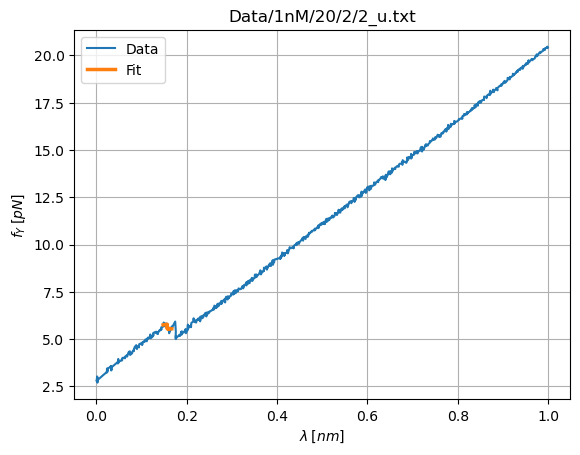

In [3]:
file = reading.readTxt(number=2, N=2, ty='u', graph=True)

In [4]:
reading.params_df

,f_rupture,f_rupture_next,x_ssDNA,N_nucleotides,t_0,λ_0,a_pre,b_pre,a_post,b_post,N_fits
0,5.79595,5.534717,24.322218,70.007278,0.887695,0.15691,4.103853,5.141548,0.672033,5.429268,2


In [5]:
reading.f_rupture, reading.f_rupture_next 

([5.7959499999999995], [5.53471676209912])

The break point λ_0 [0.134295325670644] could be smaller/higher than expected
or the rupture force [4.4437] smaller/higher than expected
χ² = [0.85708796 0.7554511 ]


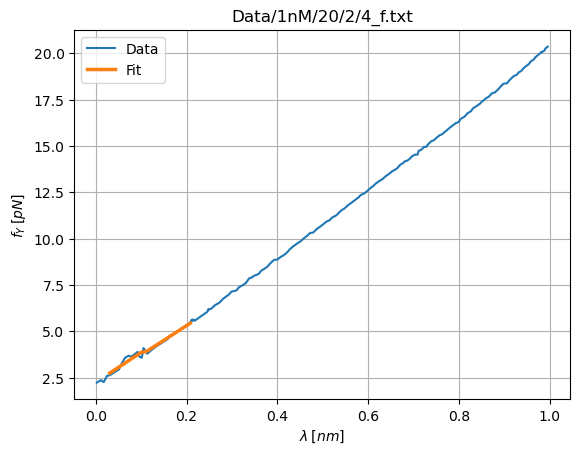

In [6]:
file = reading.readTxt(number=2, N=4, ty='f', graph=True)

In [7]:
reading.params_df

,f_rupture,f_rupture_next,x_ssDNA,N_nucleotides,t_0,λ_0,a_pre,b_pre,a_post,b_post,N_fits
0,4.1003,3.809226,7.714931,25.654061,3.83691,0.105089,16.10629,2.250563,15.79385,2.149467,2


In [8]:
# plt.plot(reading.λ[:600], reading.force_Y[:600])
# plt.scatter(reading.λ_0, reading.f_rupture, marker="^", c="red")
# plt.scatter(reading.λ[(reading.index+1)[0]], reading.f_rupture_next, marker="v", c="orange", s=1000);

In [9]:
reading.f_rupture, reading.f_rupture_next

([4.1003], [3.8092259987594352])

The break point λ_0 [0.09946247082005652] could be smaller/higher than expected
or the rupture force [4.1898] smaller/higher than expected
χ² = [7.12277918 5.54362883]


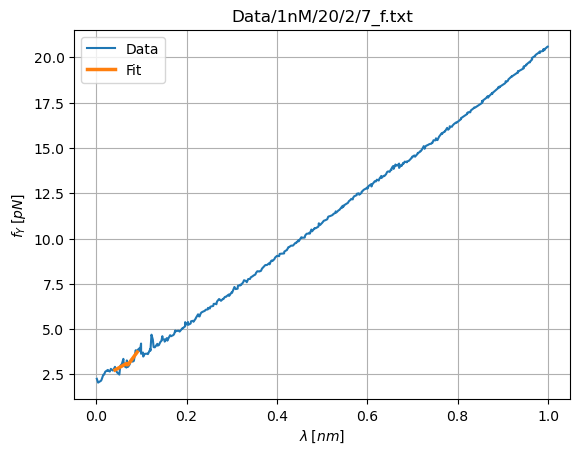

,f_rupture,f_rupture_next,x_ssDNA,N_nucleotides,t_0,λ_0,a_pre,b_pre,a_post,b_post,N_fits
0,3.274,2.950144,9.402186,35.093855,4.122555,0.067788,14.137904,2.156715,33.996345,0.645603,2


In [10]:
file = reading.readTxt(number=2, N=7, ty='f', graph=True)
reading.params_df

In [11]:
# Columns: CycleCount, X_force,	Y_force, Z_force, time(sec), Status, λ

The break point λ_0 [0.022892658431785083] could be smaller/higher than expected
or the rupture force [2.682] smaller/higher than expected


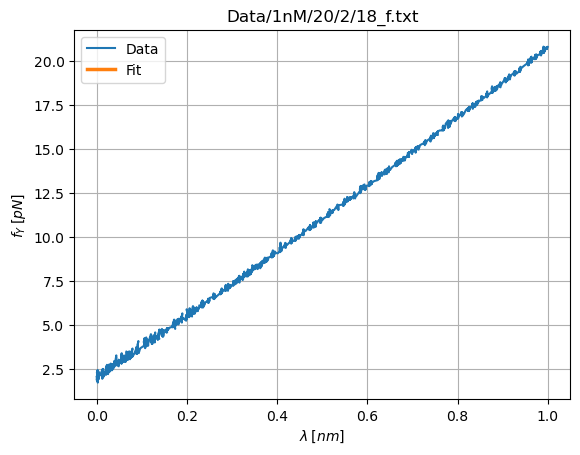

,f_rupture,f_rupture_next,x_ssDNA,N_nucleotides,t_0,λ_0,a_pre,b_pre,a_post,b_post,N_fits
0,0,0,0,0,0.0,0,0,0,0,0,1


In [12]:
file = reading.readTxt(number=2, N=18, ty='f', graph=True)
reading.params_df

In [13]:
molecules, all_molecules_f, all_molecules_u = reading.sequential_analysis()

  0%|          | 0/5 [00:00<?, ?it/s]

Not saving file Data/1nM/20/2/1_f.txt
Not saving file Data/1nM/20/2/10_f.txt
Not saving file Data/1nM/20/2/52_f.txt
Not saving file Data/1nM/20/2/1_u.txt
Not saving file Data/1nM/20/2/10_u.txt
Not saving file Data/1nM/20/12/41_f.txt
Not saving file Data/1nM/20/12/46_u.txt
Not saving file Data/1nM/20/18/6_f.txt
Not saving file Data/1nM/20/18/7_f.txt
Not saving file Data/1nM/20/18/14_f.txt
Not saving file Data/1nM/20/18/1_u.txt
Not saving file Data/1nM/20/18/13_u.txt
Not saving file Data/1nM/20/18/50_u.txt
Not saving file Data/1nM/20/21/8_f.txt
Not saving file Data/1nM/20/21/1_u.txt
Not saving file Data/1nM/20/22/1_u.txt
Not saving file Data/1nM/20/22/29_u.txt
Not saving file Data/1nM/20/22/30_u.txt
Saving results...


In [14]:
reading.path, reading.index

('Data/1nM/20/22/51_u.txt', [0])

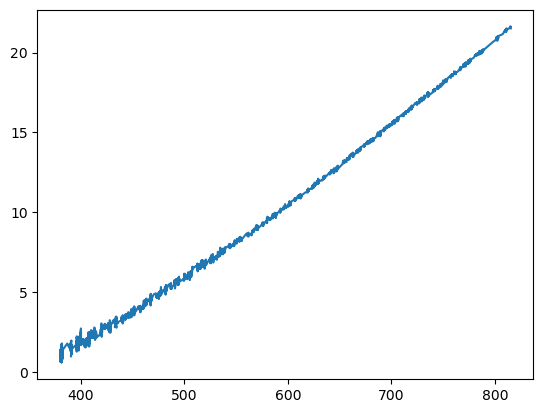

In [15]:
λ = reading.file[1:, -1]
force_Y = np.abs(reading.file[1:, 2])
plt.plot(λ, force_Y);

The break point λ_0 [0.15872458354928645] could be smaller/higher than expected
or the rupture force [4.9219] smaller/higher than expected
χ² = [0.80563309 0.60650765]


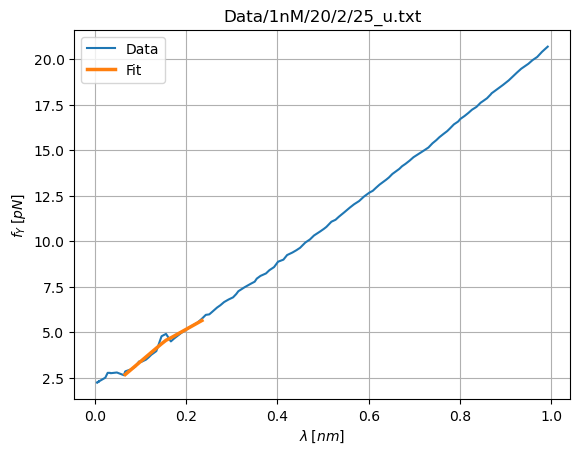

In [16]:
file = reading.readTxt(number=2, N=25, ty='u', graph=True)

In [17]:
reading.params_df

,f_rupture,f_rupture_next,x_ssDNA,N_nucleotides,t_0,λ_0,a_pre,b_pre,a_post,b_post,N_fits
0,4.9219,4.556692,7.415688,22.74134,0.7207,0.156144,21.256448,1.270134,14.007886,2.369444,2


In [18]:
reading.k_eff

0.05874144835728671

In [19]:
tot = 0
for i in all_molecules_f:
    tot += len(i)
tot # total number of experiments performed

198

In [20]:
molecules, all_molecules_f, all_molecules_u

([2, 12, 18, 21, 22],
 [[[[3.7983,
     3.2766602816674264,
     9.531010411916618,
     32.8969492126601,
     472.53028000000086]],
   [[3.9659,
     3.6539709503214706,
     8.512524319626461,
     28.762566998779917,
     480.7954149999996]],
   [[4.1003,
     3.8092259987594352,
     7.7149306463053176,
     25.654060838024243,
     489.3691400000007]],
   [[3.2275,
     3.0116290325207884,
     4.677067134544898,
     17.596544611611808,
     497.9589899999992]],
   [[4.9663,
     4.5474492335182415,
     16.293124842853143,
     49.780939714943166,
     506.06153000000086]],
   [[3.274,
     2.950143920919508,
     9.40218564620182,
     35.0938554556884,
     514.9965849999999]],
   [[4.9,
     4.568285925308659,
     12.906477220963424,
     39.65280320402843,
     522.7216800000006]],
   [[4.296,
     4.006518045314049,
     6.332396835004552,
     20.6041316549527,
     531.3408199999994]],
   [[0, 0, 0, 0, 610.3398500000003]],
   [[0, 0, 0, 0, 618.2177800000009]],
   [[3.65

In [21]:
# f_max = f_MAX[4]
# colors = ["#7afdd6","#77ff94","#a1e44d","#60993e","#613a3a", 
#             "#e3b505","#95190c","#610345","#107e7d","#044b7f"]
# markers = ["D", "o", "v", "^", "1", "8", "s", "p", "*", "x"]

# for m in range(len(molecules)):
#     col = colors[m]
#     for i in range(len(all_molecules_f[m])):
#         lab = f'Molecule {m}' if i == 0 else ''
#         f, f_next, x_ssDNA, N_nucleotides, t_0 = all_molecules_f[m][i][0]
#         plt.scatter(t_0, f_next, c=col, marker=markers[m], label=lab)
# plt.grid()
# plt.legend(loc='best')
# plt.title(f'f_MAX = {f_max} -- Fold')
# # plt.xscale('log')
# plt.xlabel('Time [s]')
# plt.ylabel('$f_{rupture} \\:[pN]$')
# plt.show()

In [22]:
# Create folder for images
images_path = f'imgs/{folder}/{f_max}'
isExist = os.path.exists(images_path)
if not isExist:
    os.makedirs(images_path)
    print("The images directory is created...")

The images directory is created...


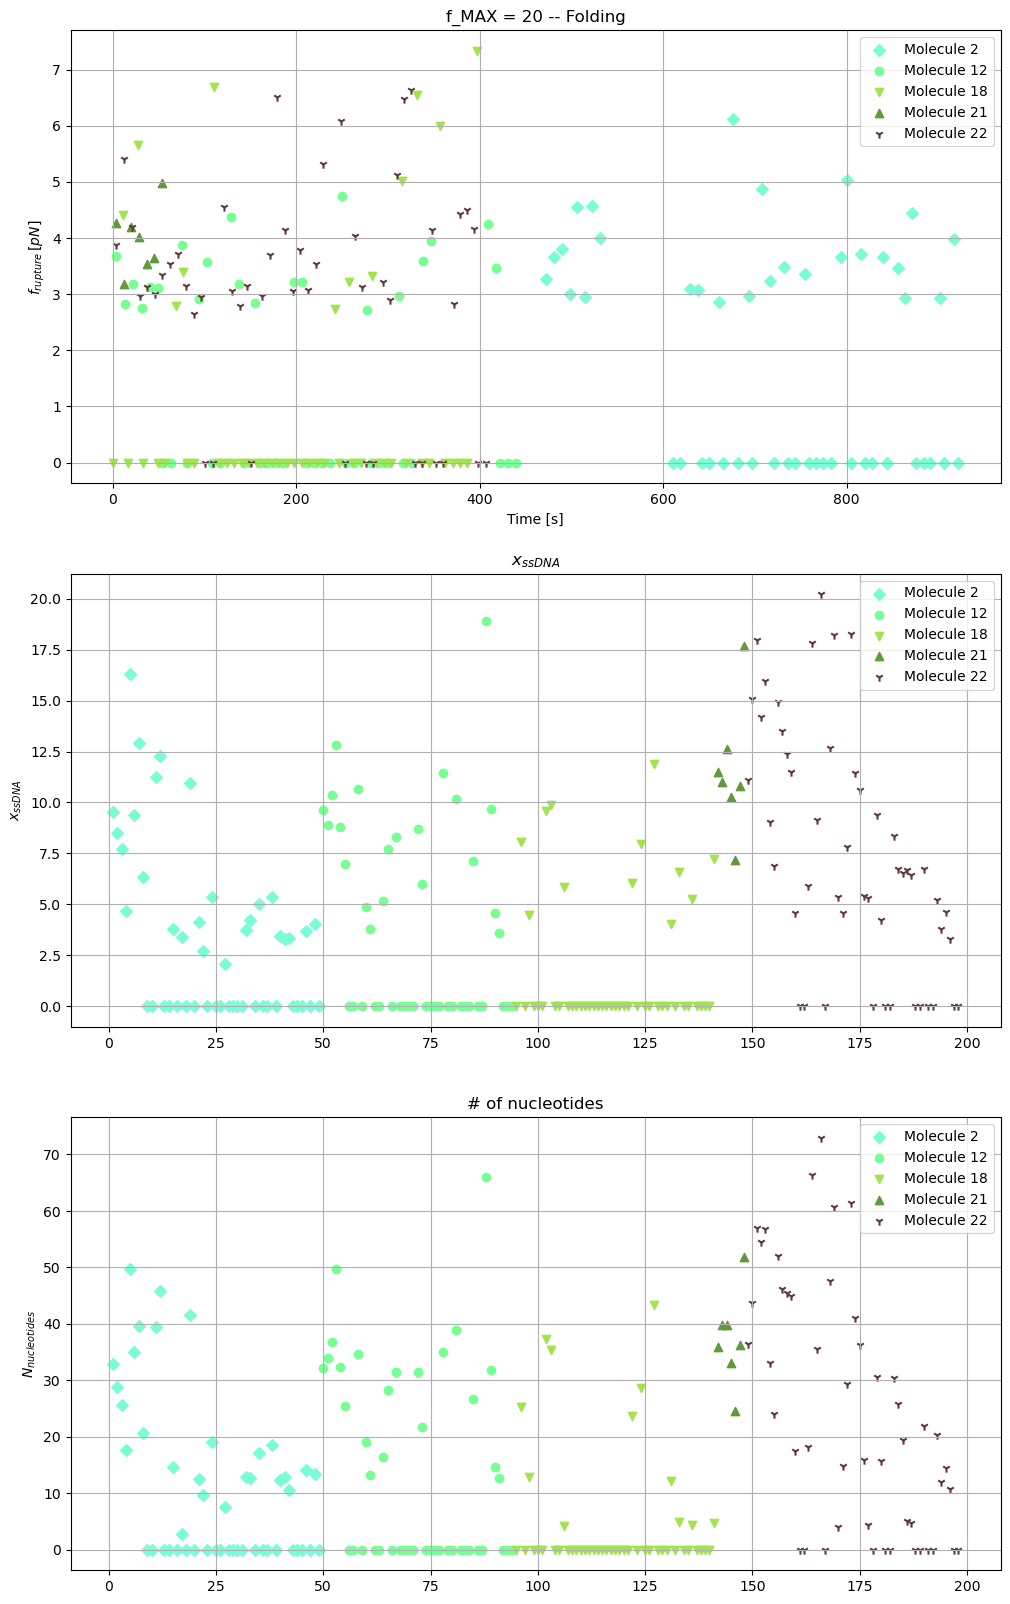

In [23]:
colors = ["#7afdd6","#77ff94","#a1e44d","#60993e","#613a3a", 
            "#e3b505","#95190c","#610345","#107e7d","#044b7f", 
            "#20bf55","#0b4f6c","#01baef","#fbfbff","#757575"]
markers = ["D", "o", "v", "^", "1", "8", "s", "p", "*", "x", 
           "d", "|", "_", "4", "P"]

fig, ax = plt.subplots(3, figsize=(12, 20))
g = 0

for m in range(len(molecules)):
    col = colors[m]
    for i in range(len(all_molecules_f[m])):
        g += 1
        lab = f'Molecule {molecules[m]}' if i == 0 else ''
        f, f_next, x_ssDNA, N_nucleotides, t_0 = all_molecules_f[m][i][0]
        ax[0].scatter(t_0, f_next, c=col, marker=markers[m], label=lab)
        ax[1].scatter(g, x_ssDNA, c=col, marker=markers[m], label=lab)
        ax[2].scatter(g, N_nucleotides, c=col, marker=markers[m], label=lab)

ax[0].grid()
ax[0].legend(loc='best')
ax[0].set_title(f'f_MAX = {f_max} -- Folding')
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('$f_{rupture} \\:[pN]$')

ax[1].grid()
ax[1].legend()
ax[1].set_title('$x_{ssDNA}$')
ax[1].set_ylabel('$x_{ssDNA}$')

ax[2].grid()
ax[2].legend()
ax[2].set_title('# of nucleotides')
ax[2].set_ylabel('$N_{nucleotides}$')

plt.savefig(f'imgs/{folder}/{f_max}/f_MAX_{f_max}_Folding.png', dpi=300, bbox_inches='tight')
plt.show()

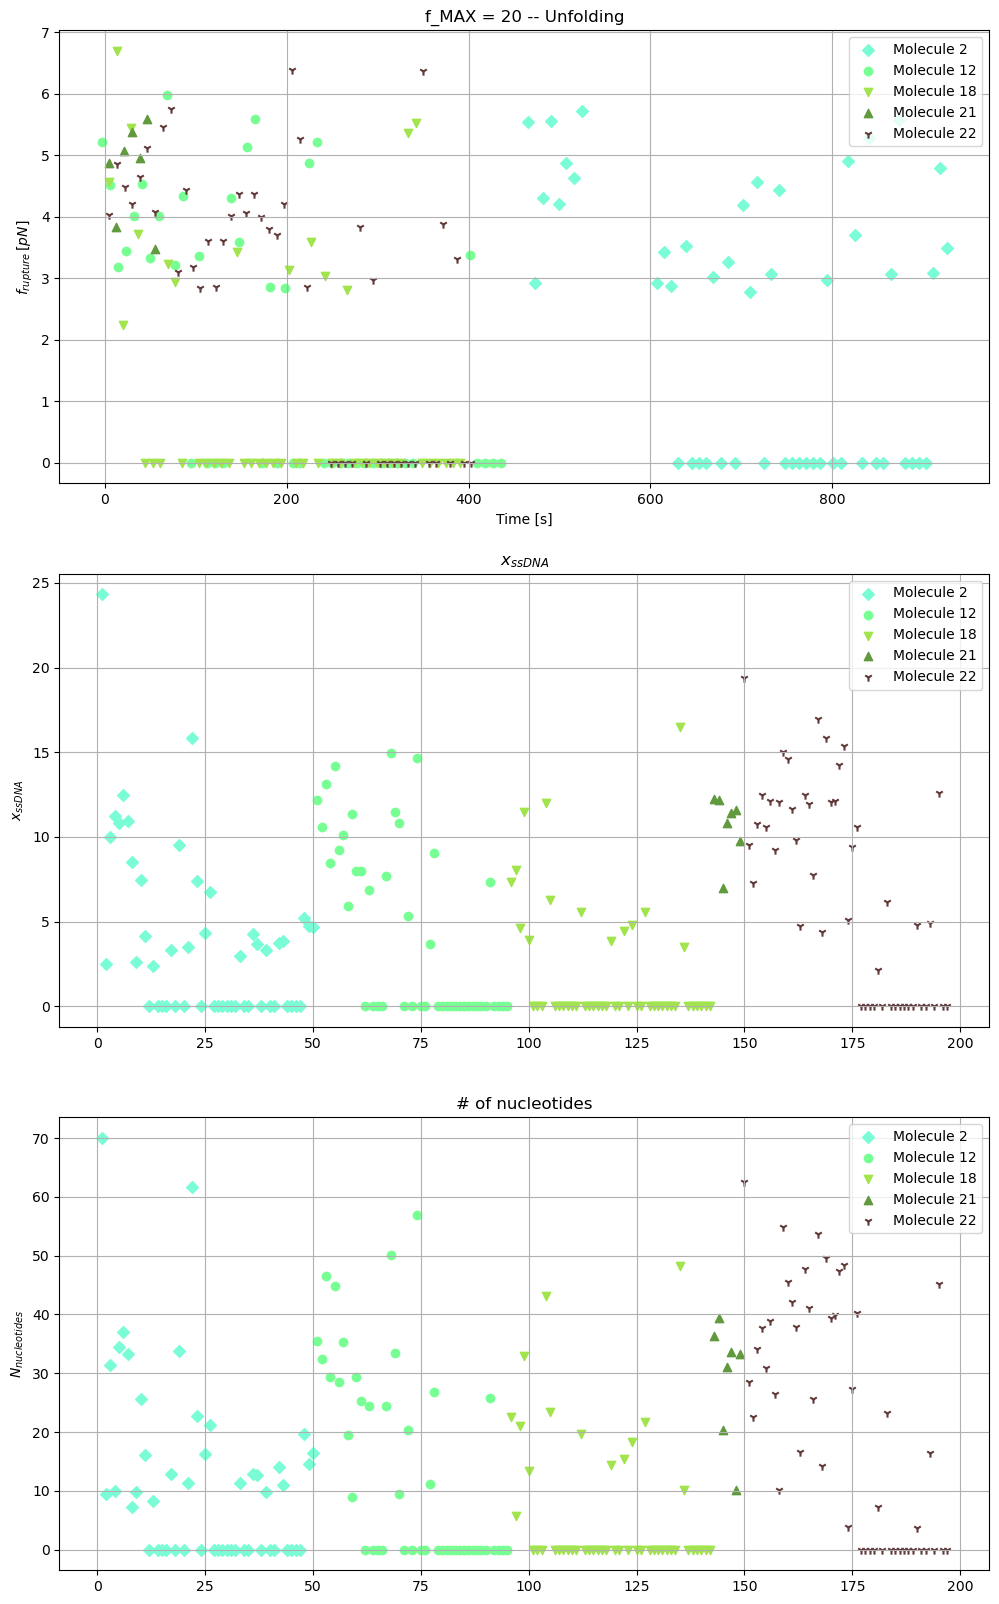

In [24]:
fig, ax = plt.subplots(3, figsize=(12, 20))
g = 0

for m in range(len(molecules)):
    col = colors[m]
    for i in range(len(all_molecules_u[m])):
        g += 1
        lab = f'Molecule {molecules[m]}' if i == 0 else ''
        f, f_next, x_ssDNA, N_nucleotides, t_0 = all_molecules_u[m][i][0]
        ax[0].scatter(t_0, f_next, c=col, marker=markers[m], label=lab)
        ax[1].scatter(g, x_ssDNA, c=col, marker=markers[m], label=lab)
        ax[2].scatter(g, N_nucleotides, c=col, marker=markers[m], label=lab)

ax[0].grid()
ax[0].legend(loc='best')
ax[0].set_title(f'f_MAX = {f_max} -- Unfolding')
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('$f_{rupture} \\:[pN]$')

ax[1].grid()
ax[1].legend()
ax[1].set_title('$x_{ssDNA}$')
ax[1].set_ylabel('$x_{ssDNA}$')

ax[2].grid()
ax[2].legend()
ax[2].set_title('# of nucleotides')
ax[2].set_ylabel('$N_{nucleotides}$')

plt.savefig(f'imgs/{folder}/{f_max}/f_MAX_{f_max}_Unfolding.png', dpi=300, bbox_inches='tight')
plt.show()

In [25]:
# Plots per single molecule

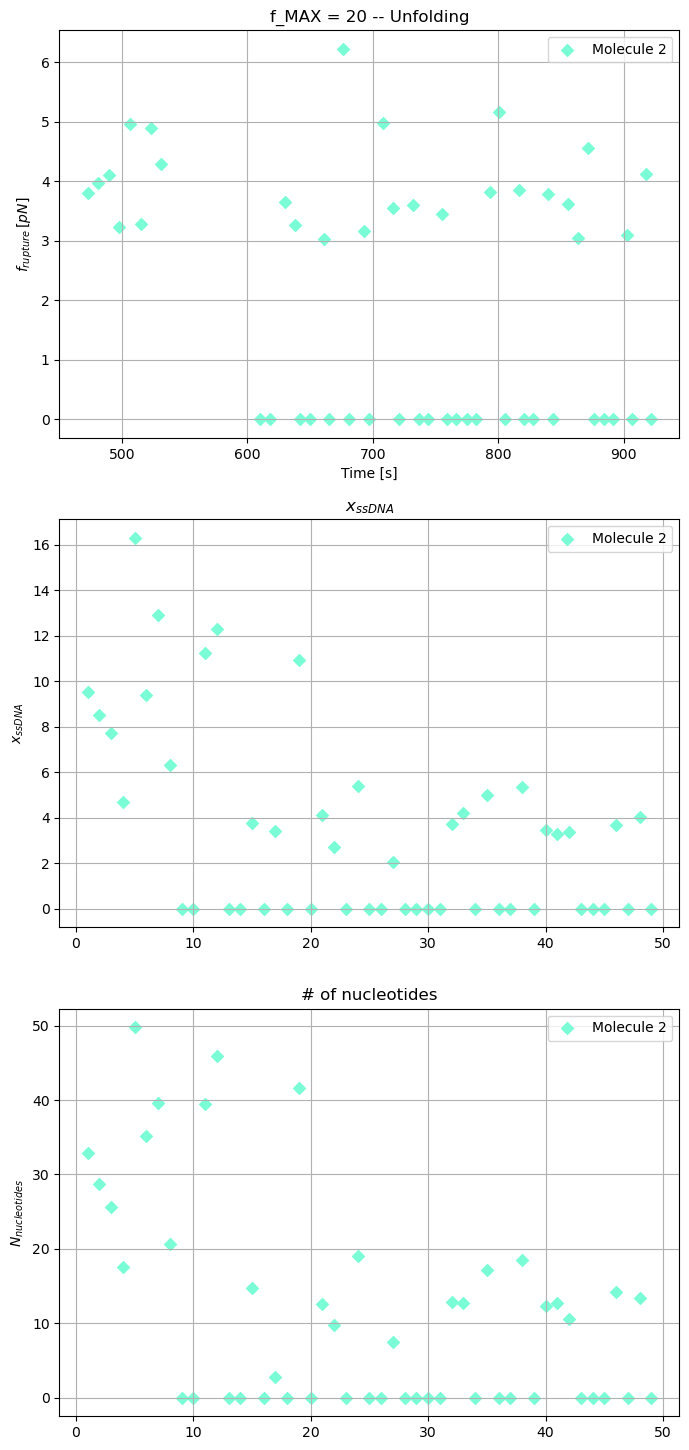

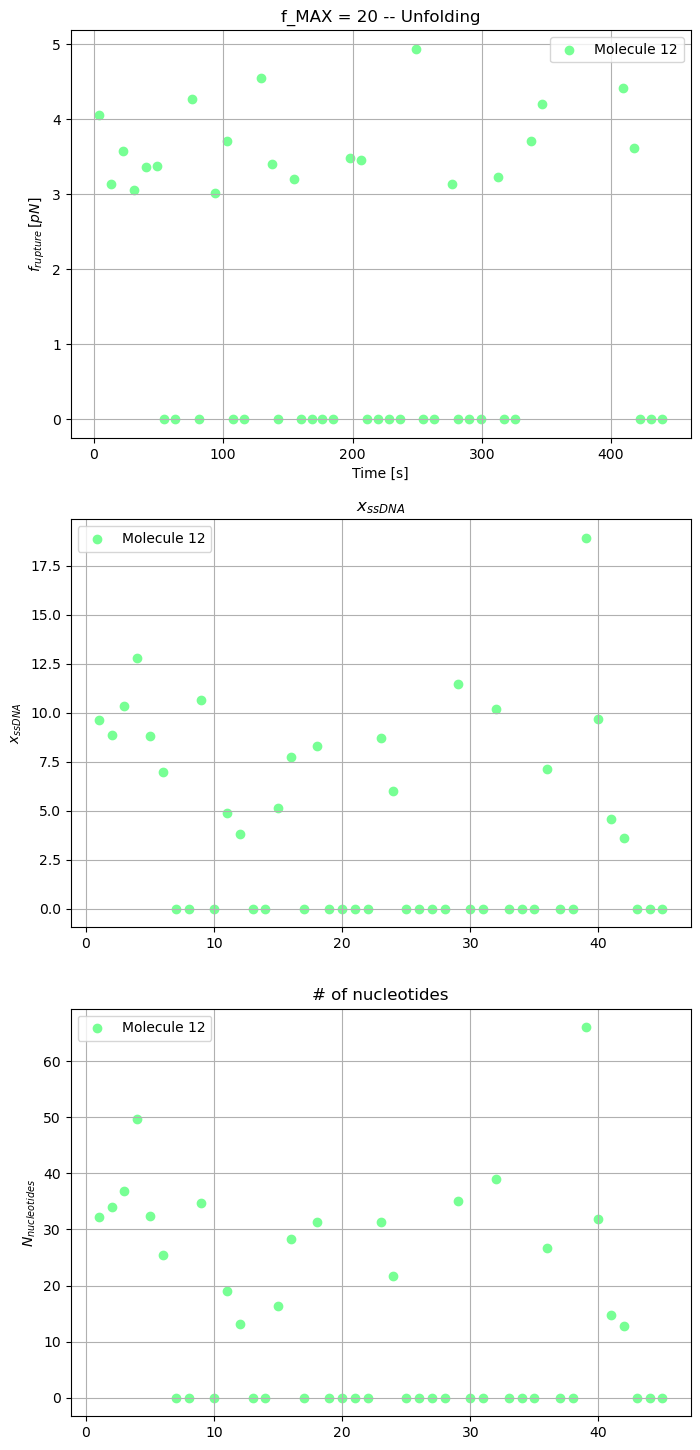

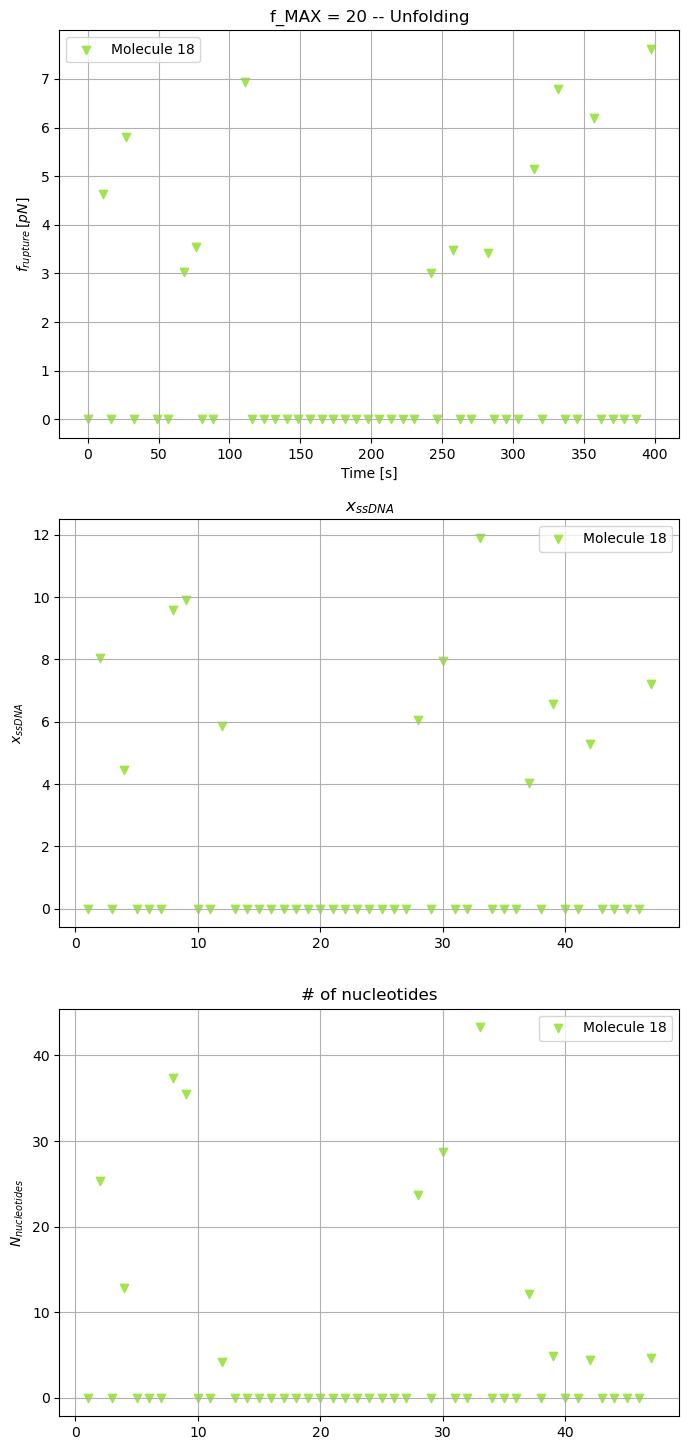

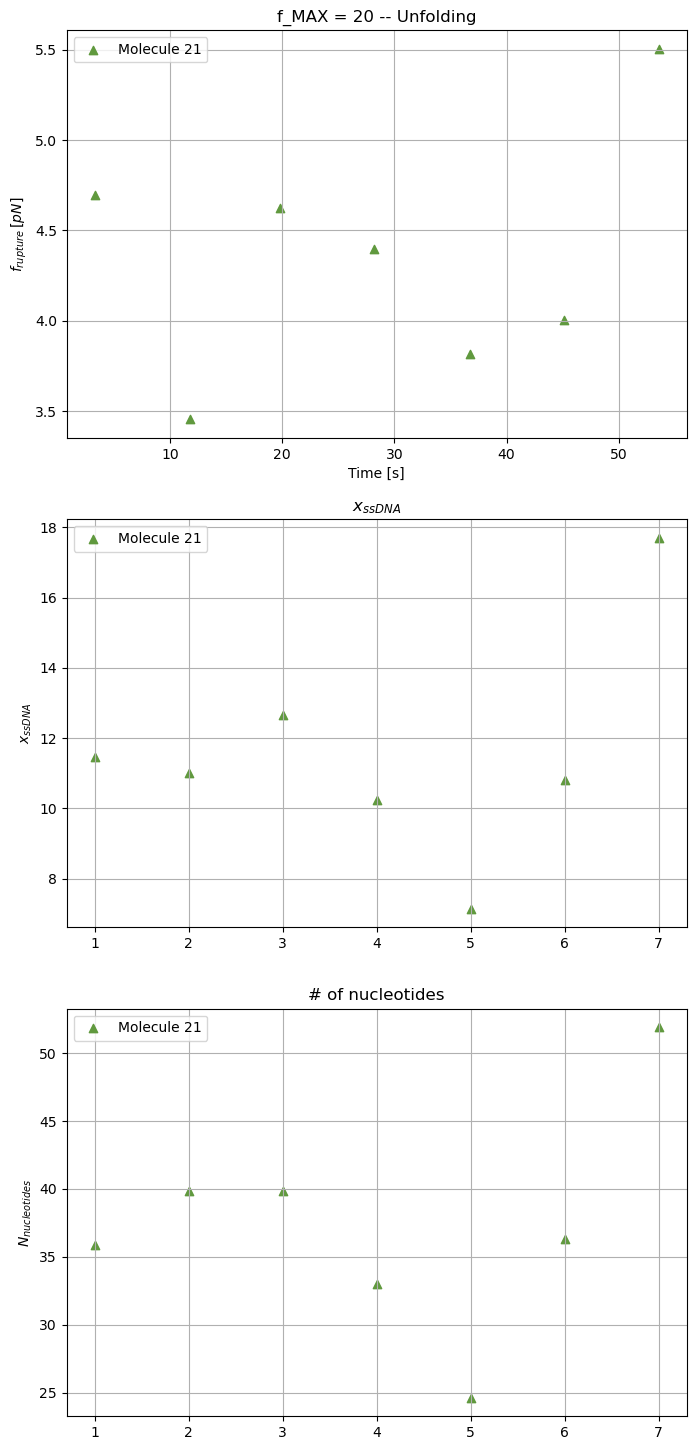

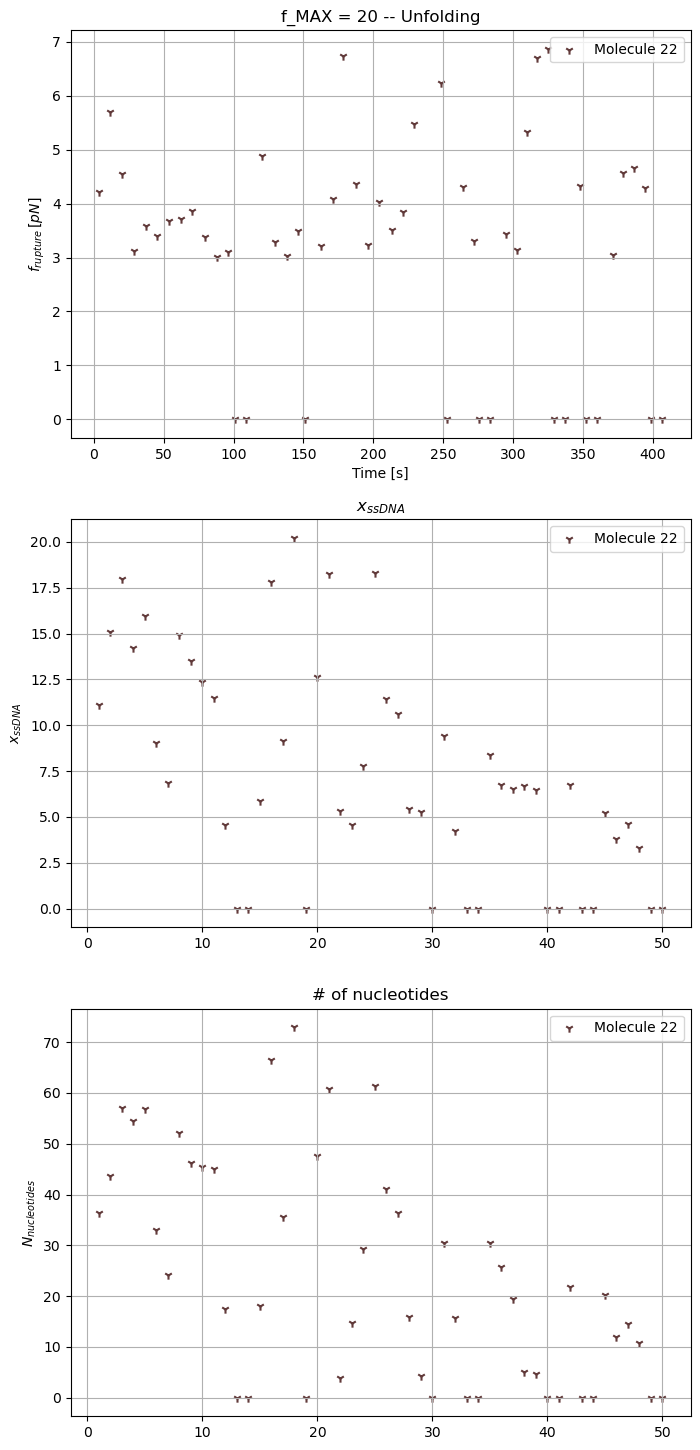

In [26]:
for m in range(len(molecules)):
    fig, ax = plt.subplots(3, figsize=(8, 18))
    col = colors[m]
    g = 0
    for i in range(len(all_molecules_f[m])):
        g += 1 
        lab = f'Molecule {molecules[m]}' if i == 0 else ''
        f, f_next, x_ssDNA, N_nucleotides, t_0 = all_molecules_f[m][i][0]
        ax[0].scatter(t_0, f, c=col, marker=markers[m], label=lab)
        ax[1].scatter(g, x_ssDNA, c=col, marker=markers[m], label=lab)
        ax[2].scatter(g, N_nucleotides, c=col, marker=markers[m], label=lab)
    ax[0].grid()
    ax[0].legend(loc='best')
    ax[0].set_title(f'f_MAX = {f_max} -- Unfolding')
    ax[0].set_xlabel('Time [s]')
    ax[0].set_ylabel('$f_{rupture} \\:[pN]$')

    ax[1].grid()
    ax[1].legend()
    ax[1].set_title('$x_{ssDNA}$')
    ax[1].set_ylabel('$x_{ssDNA}$')

    ax[2].grid()
    ax[2].legend()
    ax[2].set_title('# of nucleotides')
    ax[2].set_ylabel('$N_{nucleotides}$')
    plt.savefig(f'imgs/{folder}/{f_max}/f_MAX_{f_max}_Folding_Molecule{molecules[m]}.png', dpi=300, bbox_inches='tight')
    plt.show()

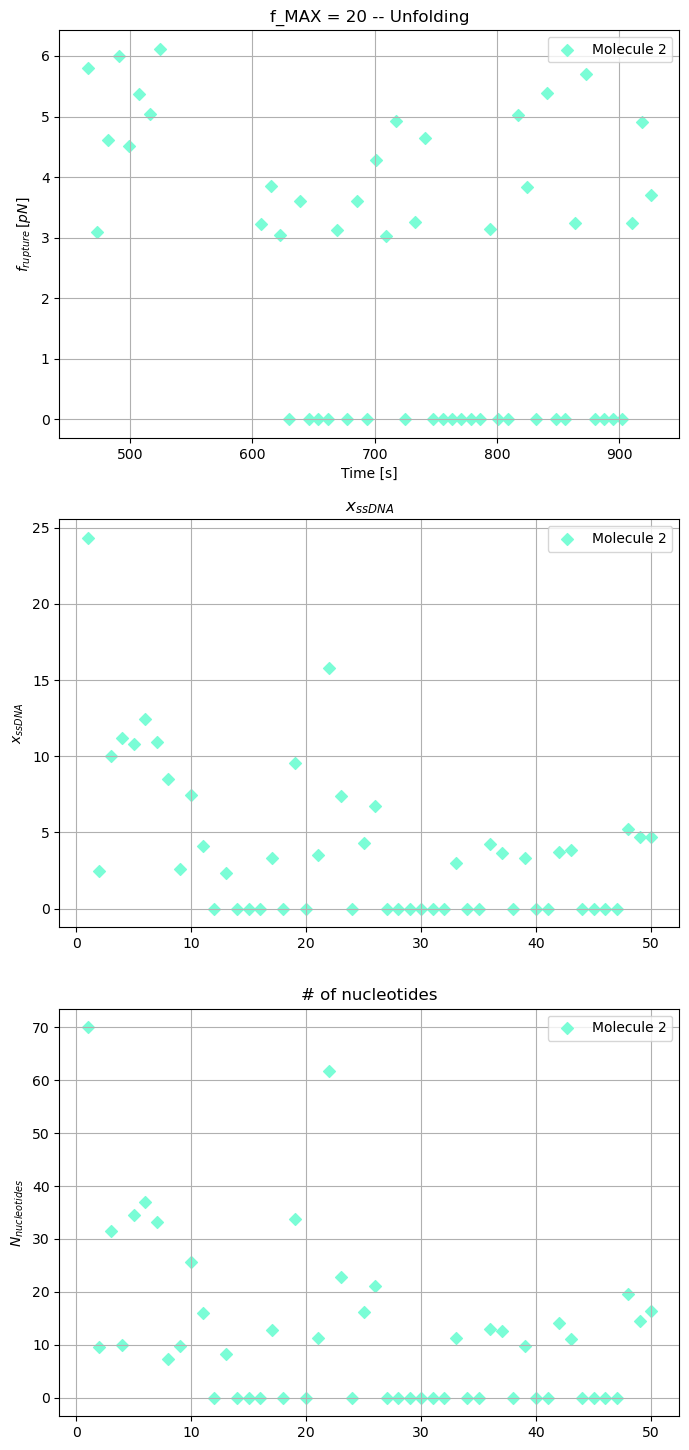

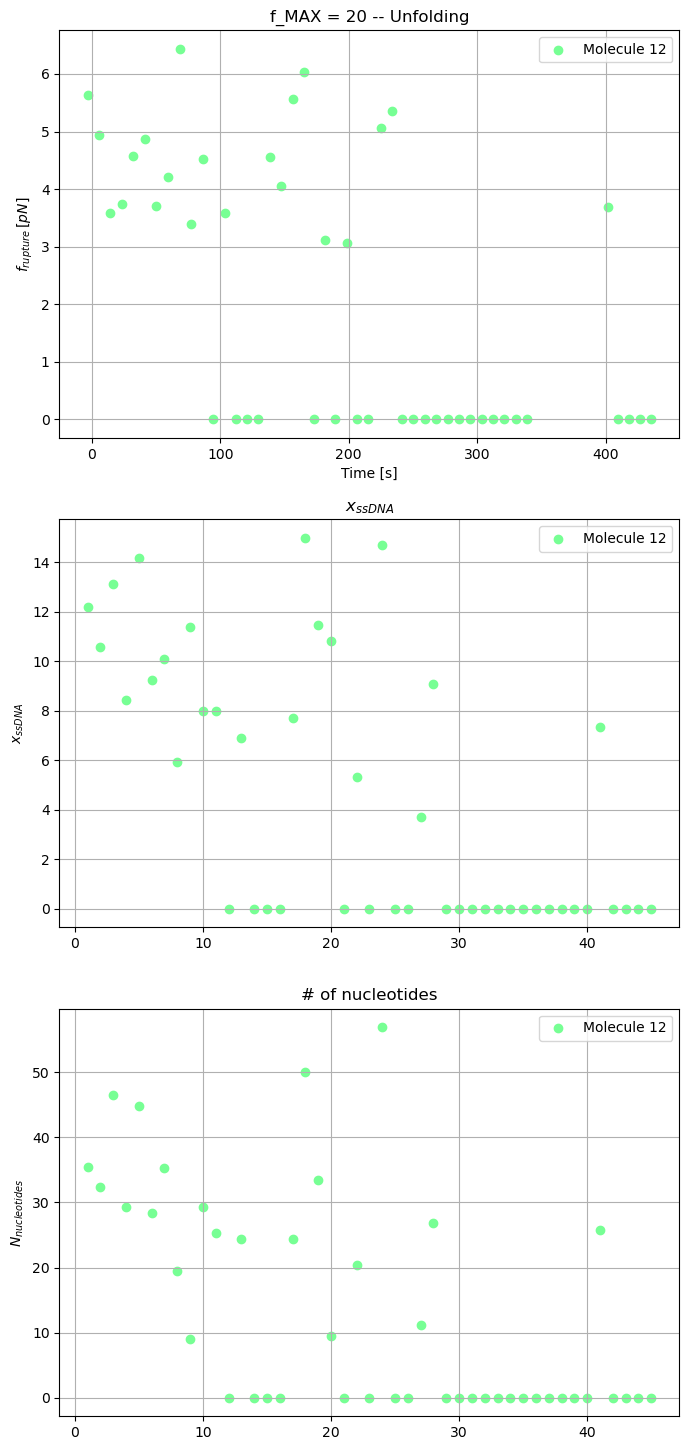

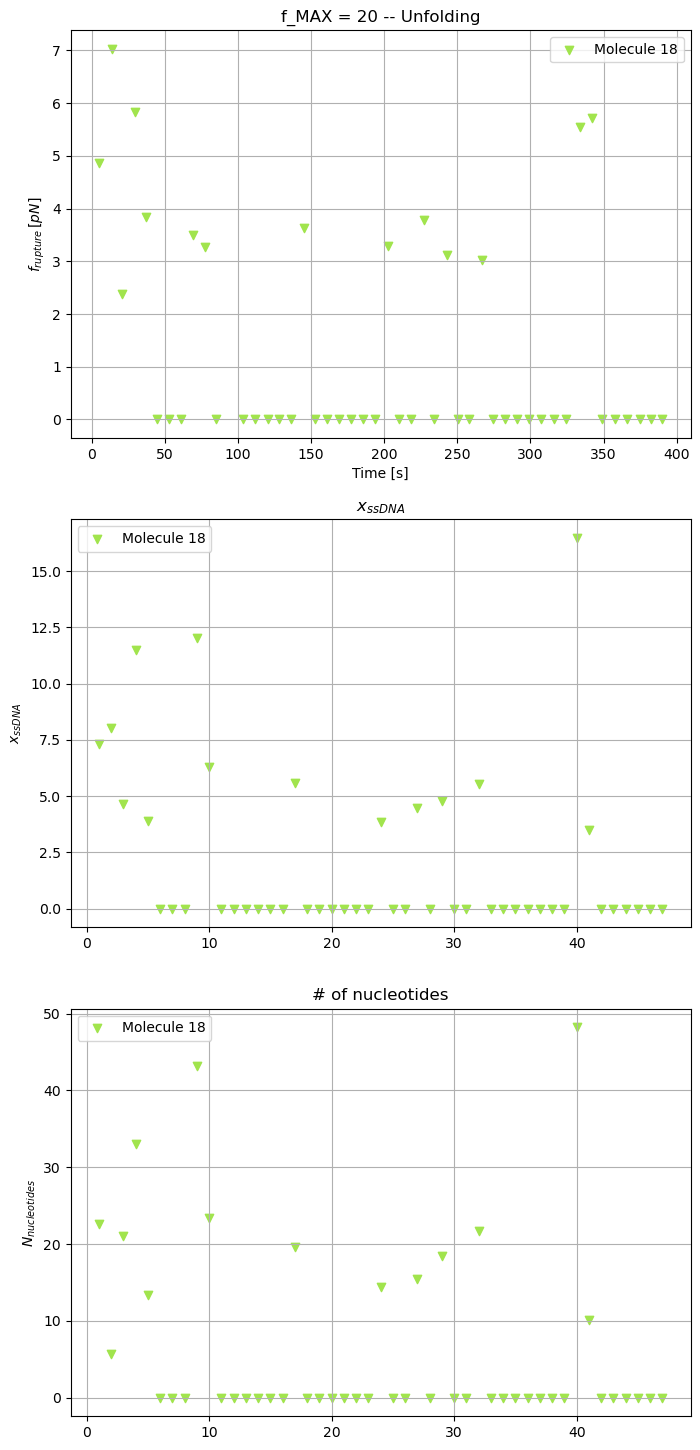

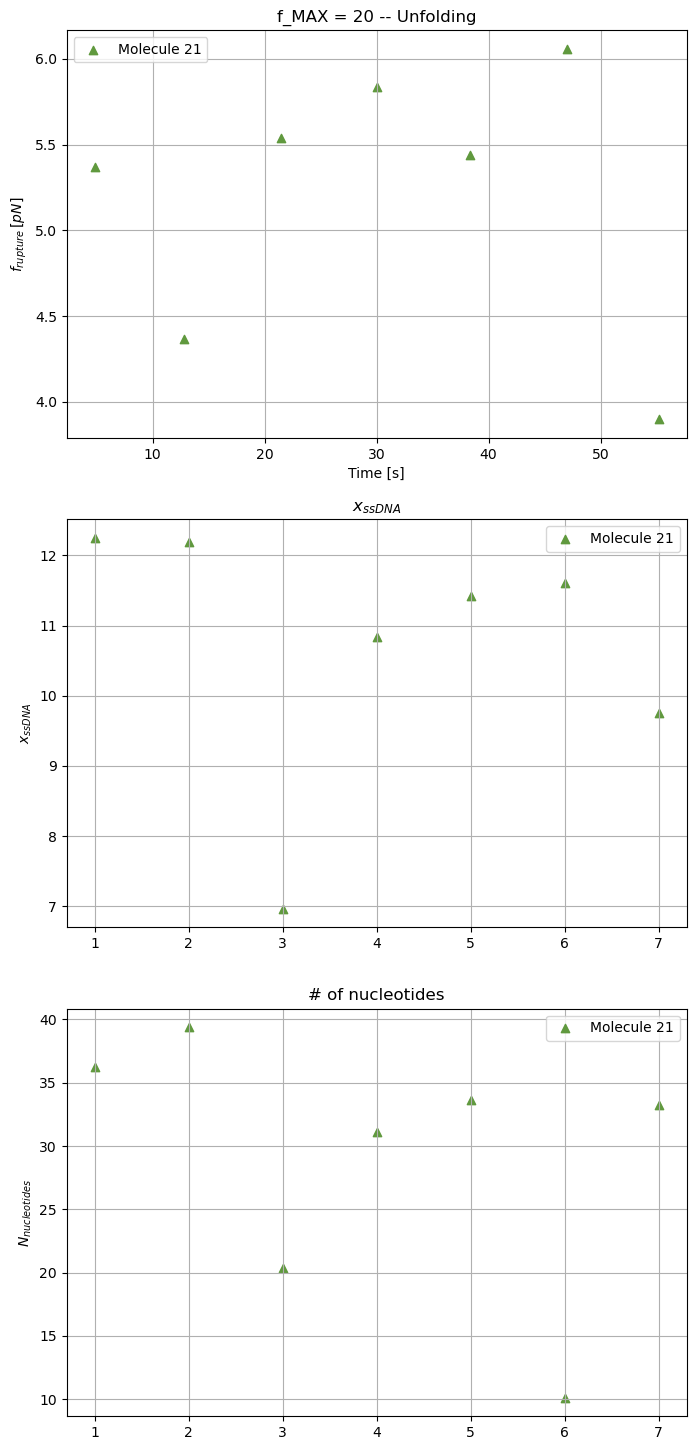

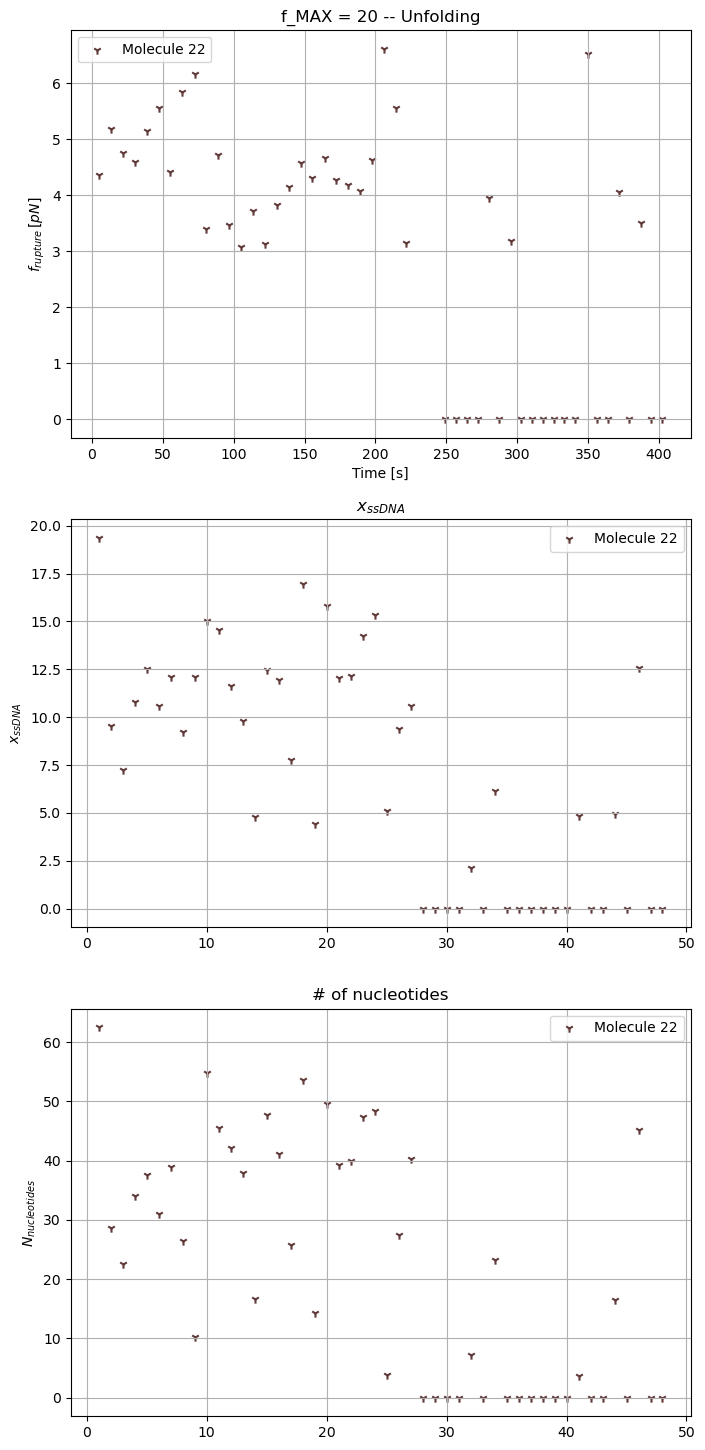

In [27]:
for m in range(len(molecules)):
    fig, ax = plt.subplots(3, figsize=(8, 18))
    col = colors[m]
    g = 0
    for i in range(len(all_molecules_u[m])):
        g += 1 
        lab = f'Molecule {molecules[m]}' if i == 0 else ''
        f, f_next, x_ssDNA, N_nucleotides, t_0 = all_molecules_u[m][i][0]
        ax[0].scatter(t_0, f, c=col, marker=markers[m], label=lab)
        ax[1].scatter(g, x_ssDNA, c=col, marker=markers[m], label=lab)
        ax[2].scatter(g, N_nucleotides, c=col, marker=markers[m], label=lab)
    ax[0].grid()
    ax[0].legend(loc='best')
    ax[0].set_title(f'f_MAX = {f_max} -- Unfolding')
    ax[0].set_xlabel('Time [s]')
    ax[0].set_ylabel('$f_{rupture} \\:[pN]$')

    ax[1].grid()
    ax[1].legend()
    ax[1].set_title('$x_{ssDNA}$')
    ax[1].set_ylabel('$x_{ssDNA}$')

    ax[2].grid()
    ax[2].legend()
    ax[2].set_title('# of nucleotides')
    ax[2].set_ylabel('$N_{nucleotides}$')
    plt.savefig(f'imgs/{folder}/{f_max}/f_MAX_{f_max}_Unfolding_Molecule{molecules[m]}.png', dpi=300, bbox_inches='tight')
    plt.show()